<a href="https://colab.research.google.com/github/zzheng2020/ID2222-Data-Mining/blob/main/Homework4_cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import networkx as nx
from sklearn.cluster import KMeans

In [36]:
data_file = 'example1.dat'

In [37]:
import networkx as nx
def load_graph(file: str, weight: bool = False) -> nx.Graph:
    if weight:
        return nx.read_weighted_edgelist(
            path=file,
            delimiter=','
        )
    else:
        return nx.read_edgelist(
            path=file,
            delimiter=','
        )

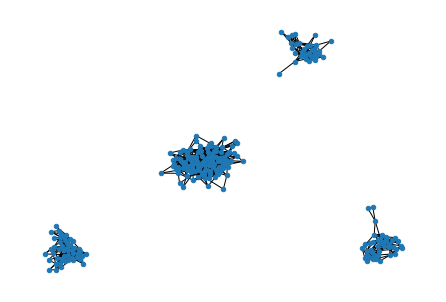

In [38]:
graph = load_graph(data_file)
graph.number_of_nodes(), graph.number_of_edges()
nx.draw(graph, node_size=20)
plt.show()

In [39]:
k = 4
A = nx.to_numpy_matrix(graph)
D = np.diagflat(np.sum(A, axis=1))
D_inv = np.linalg.inv(np.sqrt(D))
L = D_inv @ A @ D_inv
w, v = np.linalg.eigh(L) # w: eigenvalues, v: eigenvectors
X = v[:, -k:]
Y = X / np.linalg.norm(X, axis=1, keepdims=True)
res = KMeans(n_clusters=k).fit(Y).labels_
res

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
      dtype=int32)

In [45]:
_, vectors = np.linalg.eigh(D-A)

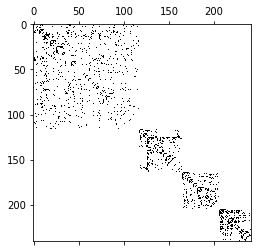

In [48]:
plt.spy(A);